<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-librairies-utiles" data-toc-modified-id="Importation-des-librairies-utiles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des librairies utiles</a></span></li><li><span><a href="#Obtention-des-données" data-toc-modified-id="Obtention-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtention des données</a></span></li><li><span><a href="#Exploration-de-la-Donnée" data-toc-modified-id="Exploration-de-la-Donnée-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploration de la Donnée</a></span><ul class="toc-item"><li><span><a href="#Identifier-les-features-et-le-Label" data-toc-modified-id="Identifier-les-features-et-le-Label-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Identifier les features et le Label</a></span></li><li><span><a href="#Etude-des-valeurs-dupliquées" data-toc-modified-id="Etude-des-valeurs-dupliquées-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Etude des valeurs dupliquées</a></span></li><li><span><a href="#Etude-basique-de-valeurs-aberrantes" data-toc-modified-id="Etude-basique-de-valeurs-aberrantes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Etude basique de valeurs aberrantes</a></span></li><li><span><a href="#Etude-des-valeurs-manquantes" data-toc-modified-id="Etude-des-valeurs-manquantes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Etude des valeurs manquantes</a></span></li><li><span><a href="#Distribution-des-données" data-toc-modified-id="Distribution-des-données-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Distribution des données</a></span></li><li><span><a href="#Matrice-de-correlations" data-toc-modified-id="Matrice-de-correlations-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Matrice de correlations</a></span></li><li><span><a href="#Résumé-de-la-partie-exploratoire---transformations-pertinentes?" data-toc-modified-id="Résumé-de-la-partie-exploratoire---transformations-pertinentes?-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Résumé de la partie exploratoire - transformations pertinentes?</a></span></li></ul></li><li><span><a href="#Préparation-des-données" data-toc-modified-id="Préparation-des-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Préparation des données</a></span><ul class="toc-item"><li><span><a href="#Gestion-des-données-manquantes" data-toc-modified-id="Gestion-des-données-manquantes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gestion des données manquantes</a></span></li><li><span><a href="#Correction-ou-suppression-de-valeurs-aberrantes" data-toc-modified-id="Correction-ou-suppression-de-valeurs-aberrantes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Correction ou suppression de valeurs aberrantes</a></span></li><li><span><a href="#Sélection-de-feature" data-toc-modified-id="Sélection-de-feature-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sélection de feature</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Feature-Scaling-and/or-Normalization" data-toc-modified-id="Feature-Scaling-and/or-Normalization-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span><a href="https://colab.research.google.com/github/ml-course/master/blob/master/notebooks/06%20-%20Data%20Preprocessing.ipynb" rel="nofollow" target="_blank">Feature Scaling and/or Normalization</a></a></span></li><li><span><a href="#Encoder-les-variables-catégorielles" data-toc-modified-id="Encoder-les-variables-catégorielles-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Encoder les variables catégorielles</a></span></li><li><span><a href="#Créer-un-pipeline" data-toc-modified-id="Créer-un-pipeline-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Créer un pipeline</a></span></li></ul></li></ul></div>

<img src="https://miro.medium.com/v2/resize:fit:1400/0*-G8VWk7x24EcOyza" alt="image" width="100%">

L'objectif de ce Lab est de préparer les données permettant de prédire les prix de l'immobilier en Californie en 1990.

Les données concernent les maisons trouvées dans un district californien donné et quelques statistiques récapitulatives à leur sujet basées sur les données du recensement de 1990. Soyez averti que les données ne sont pas nettoyées, certaines étapes de prétraitement sont donc requises ! Les colonnes sont les suivantes, leurs noms sont assez explicites :

longitude

latitude

logement_âge médian_

total_chambres

total_chambres

population

ménages

revenu_médian

valeur médiane_de la maison

océan_proximité

Le prétraitement comprend la détection et la gestion des valeurs manquantes, l'enodage des caractéristiques catégorielles et ne se limite pas à ces étapes.

## Importation des librairies utiles

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import des librairies
import os, random

import numpy as np # manipulation de matrices
import pandas as pd # chargement de donnees

#visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

# visualition de valeurs manquantes
import missingno as msno

# gestion des valeurs manquantes
from sklearn.impute import SimpleImputer

# encodage des variables categorielles
from sklearn.preprocessing import OneHotEncoder  

# mise a l'echelle des variables numeriques
from sklearn.preprocessing import StandardScaler  

# separation de la donnee en train, validation, et test
from sklearn.model_selection import train_test_split

# création de pipeline
from sklearn.pipeline import Pipeline


In [2]:
# ne modifier pas ce bout de code
seed = 2024
random.seed(seed)
np.random.seed(seed)

## Obtention des données

La donnée nécessaire pour ce Lab se trouve dans le dossier data/housing.csv.

In [3]:
# charger la donnée  
housing_df = pd.read_csv("data/housing.csv")

In [11]:
# afficher les 5 premières lignes
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
# vérifier la taille de la donnée
print(housing_df.shape)

(20640, 10)


In [16]:
# vérifier le type de donnée (série temporelle, échantillon, géographique, ...)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Le data dredging (également connu sous le nom de data snooping ou p-hacking) est l'utilisation abusive de l'analyse de données pour trouver des modèles dans les données qui peuvent être présentés comme statistiquement significatifs, augmentant ainsi considérablement le risque de faux positifs et le sous-estimant.

In [17]:
# mettez un échantillon de 20% de la donnée de côté que vous ne regarderez jamais 
# en utilisant train_test_split. Utiliser random_state = 67
housing_train_df, housing_test_df = train_test_split(housing_df, test_size=0.2, random_state=67)

# sauvegarder les ensembles crees a l'aide de pd.to_csv dans le dossier data
# sous les noms housing_train.csv et housing_test.csv
housing_train_df.to_csv("data/housing_train.csv")
housing_test_df.to_csv("data/housing_test.csv")

Pour les analyses subséquentes, veillez à ne travailler qu'avec la donnée d'entraînement.

## Exploration de la Donnée

### Identifier les features et le Label

- Combien de features/ caractéristiques sont présentes dans le jeu de données?
- Quels sont leurs types?
- Le Label est-il continu ou catégoriel?

In [47]:
# Nombre total de features présentes dans le dataset et leur type
print(housing_df.dtypes, '\n')
print(f"Total of features : {housing_df.columns.shape[0]}")

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object 

Total of features : 10


In [58]:
# Label continu ou catégoriel
print("La variable cible est continue -----> ", housing_df["median_house_value"].dtype)


La variable cible est continue ----->  float64


### Etude des valeurs dupliquées

In [63]:
print(f"Nombre total de valeurs dupliquées : ", housing_df.duplicated().sum())

Nombre total de valeurs dupliquées :  0


### Etude basique de valeurs aberrantes

In [94]:
## description du jeu de données et interpretation
housing_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [107]:
# comparaison des valeurs extrêmes au valeurs centrales
summary = housing_df.describe()
comparison = pd.DataFrame({
    "Valeurs_extrêmes" : summary.loc['max'],
    "Valeurs_centrales" : summary.loc['50%'],
    "Ecart" : summary.loc['max']-summary.loc['50%'],
    })
print("Tableau comparatif des valeurs extrêmes au valeurs centrales")
comparison

Tableau comparatif des valeurs extrêmes au valeurs centrales


,Valeurs_extrêmes,Valeurs_centrales,Ecart
longitude,-114.3100,-118.4900,4.1800
latitude,41.9500,34.2600,7.6900
housing_median_age,52.0000,29.0000,23.0000
total_rooms,39320.0000,2127.0000,37193.0000
total_bedrooms,6445.0000,435.0000,6010.0000
population,35682.0000,1166.0000,34516.0000
households,6082.0000,409.0000,5673.0000
median_income,15.0001,3.5348,11.4653
median_house_value,500001.0000,179700.0000,320301.0000


### Etude des valeurs manquantes

**Simple tableau**|
---

In [165]:
# visualiser les valeurs manquantes de quatre façons différentes
# et interpréter chaque visualisation
# simple tableau
print("Tableau récapitulatif des valeurs manquantes dans le dataset")
nan_count = housing_df.isna().sum()
nan_per = round(nan_count*100/housing_df.shape[0], 2)
nan_summary = pd.DataFrame({"Nombre de valeurs manquantes" : nan_count,
            "Proportion en pourcentage" : nan_per.astype(str)+" %"})
nan_summary

Tableau récapitulatif des valeurs manquantes dans le dataset


,Nombre de valeurs manquantes,Proportion en pourcentage
longitude,0,0.0 %
latitude,0,0.0 %
housing_median_age,0,0.0 %
total_rooms,0,0.0 %
total_bedrooms,207,1.0 %
population,0,0.0 %
households,0,0.0 %
median_income,0,0.0 %
median_house_value,0,0.0 %
ocean_proximity,0,0.0 %


**Dendrogramme**|
---

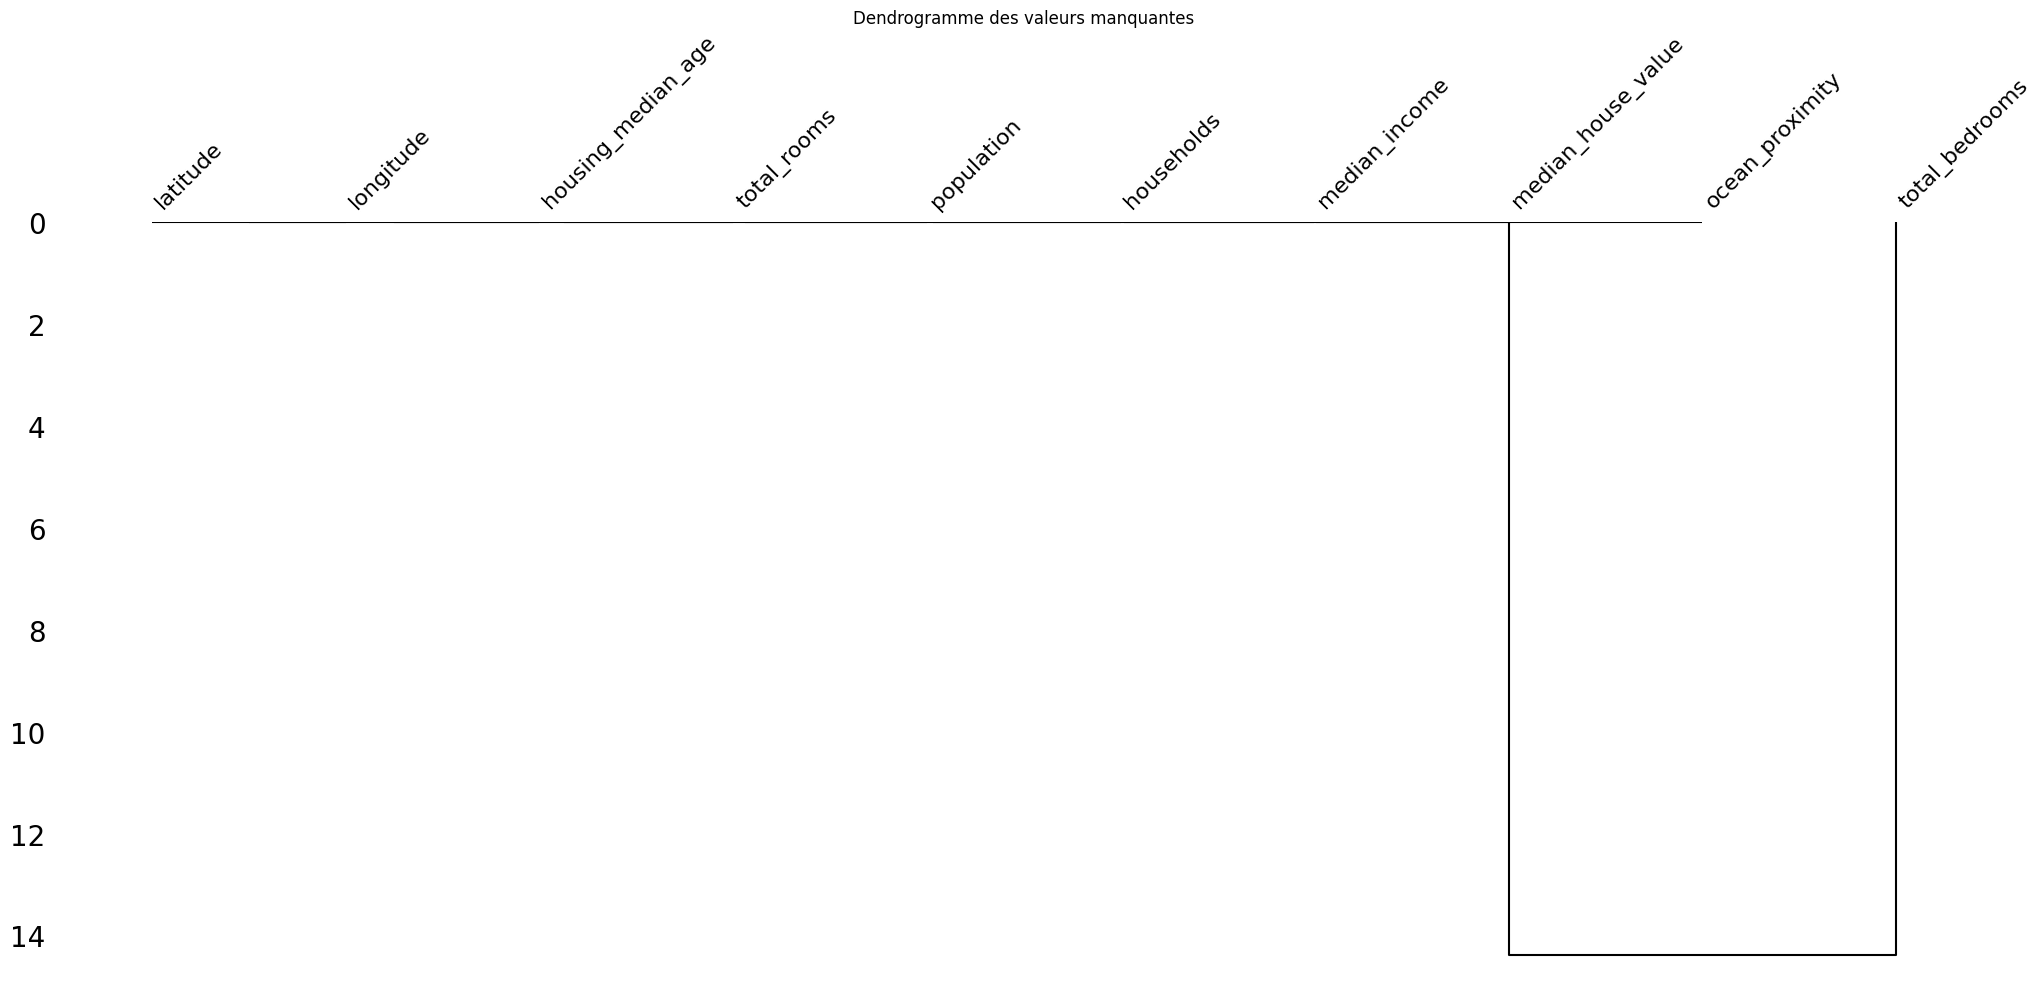

In [163]:
# dendrograme
msno.dendrogram(housing_df)
plt.show()

<u>**Interpretation**</u>

Toutes les variables, à l'exception de total_bedrooms, sont reliées entre elles par une ligne horizontale. Cela indique que le schéma de distribution des valeurs manquantes pour ces variables est similaire, probablement parce qu'elles ont toutes un nombre équivalent de valeurs manquantes nulles.

En revanche, la distance entre la variable `total_bedrooms` et les autres indique que le schéma de distribution de ses valeurs manquantes diffère des 9 autres variables. Ainsi, nous pouvons identifier deux classes de distribution des valeurs manquantes. La longueur de la liaison entre ces deux classes, s'étendant sur **14 unités**, représente le degré de cet écart ou de cette différence.

**Heatmap**|
---

<Axes: >

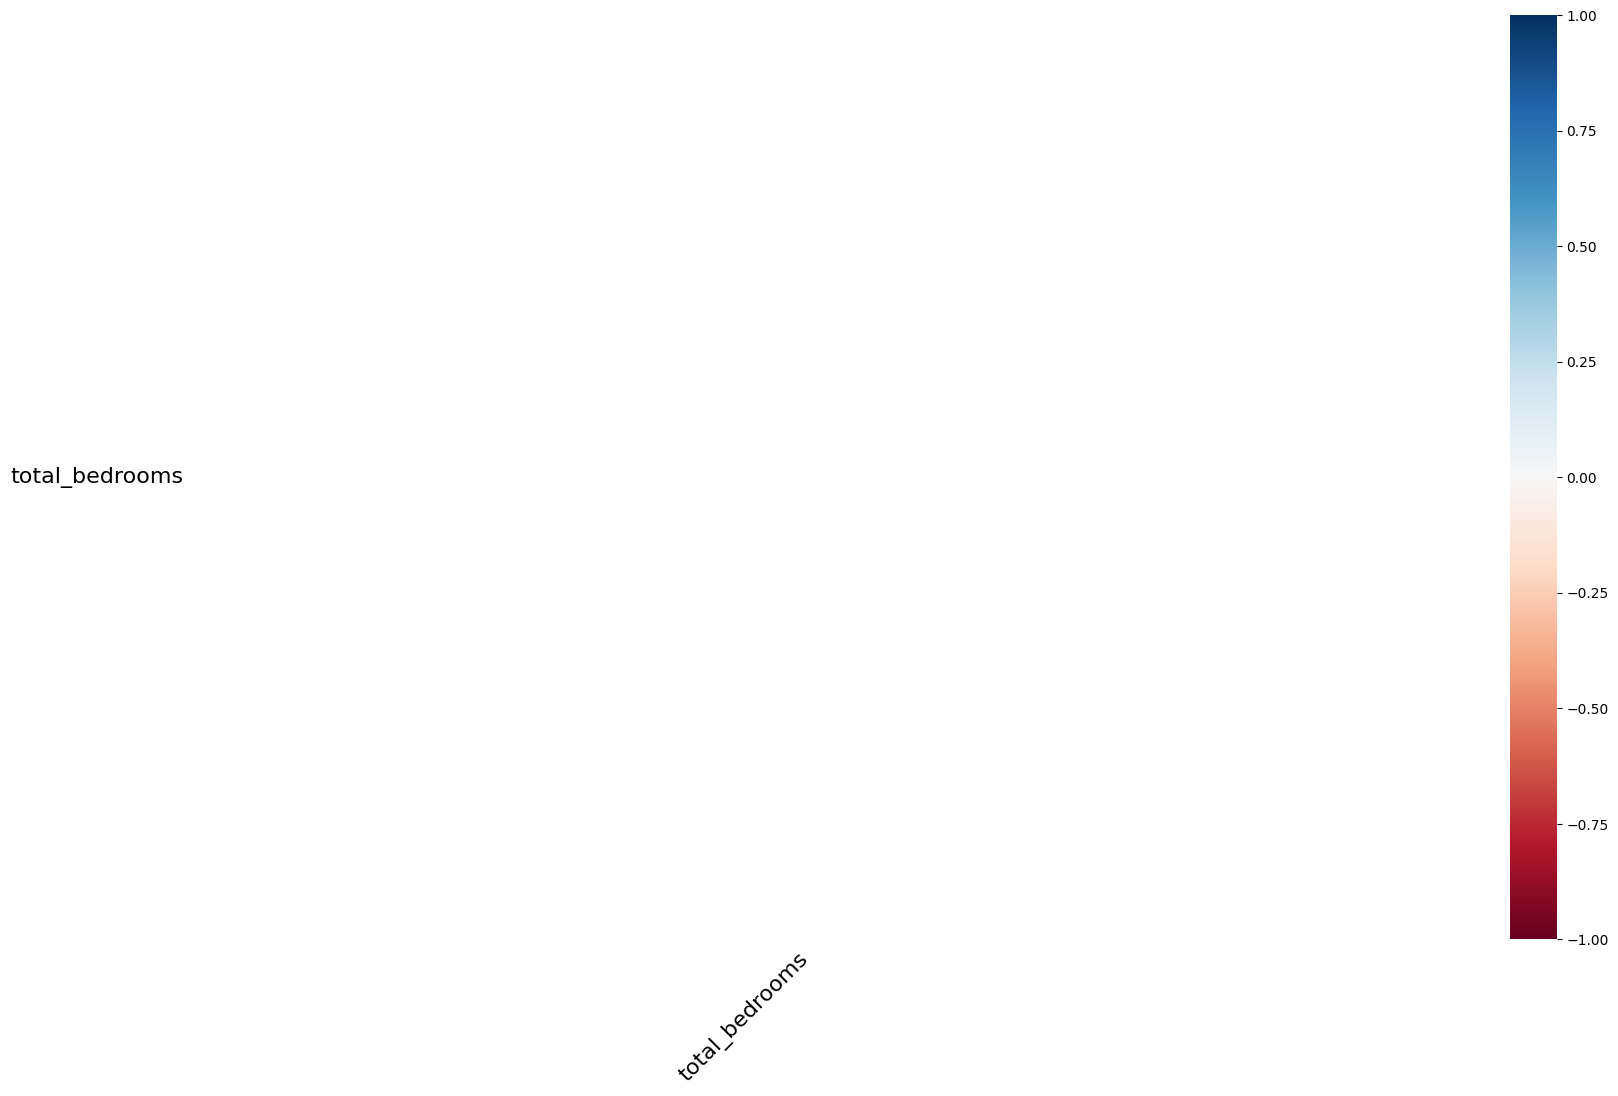

In [171]:
# heatmap de correlations
msno.heatmap(housing_df)

<u> **Interpretation** </u>

Ici, étant donné qu'il n'y a qu'une seule variable contenant des valeurs manquantes, aucune interprétation utile ne peut être tirée du graphe. Heatmap du package missingno permet en fait d'évaluer le dégré d'icidence des valeurs manquantes d'une colonne sur les autres et ainsi de suite. 

**Matrix**|
---

<Axes: >

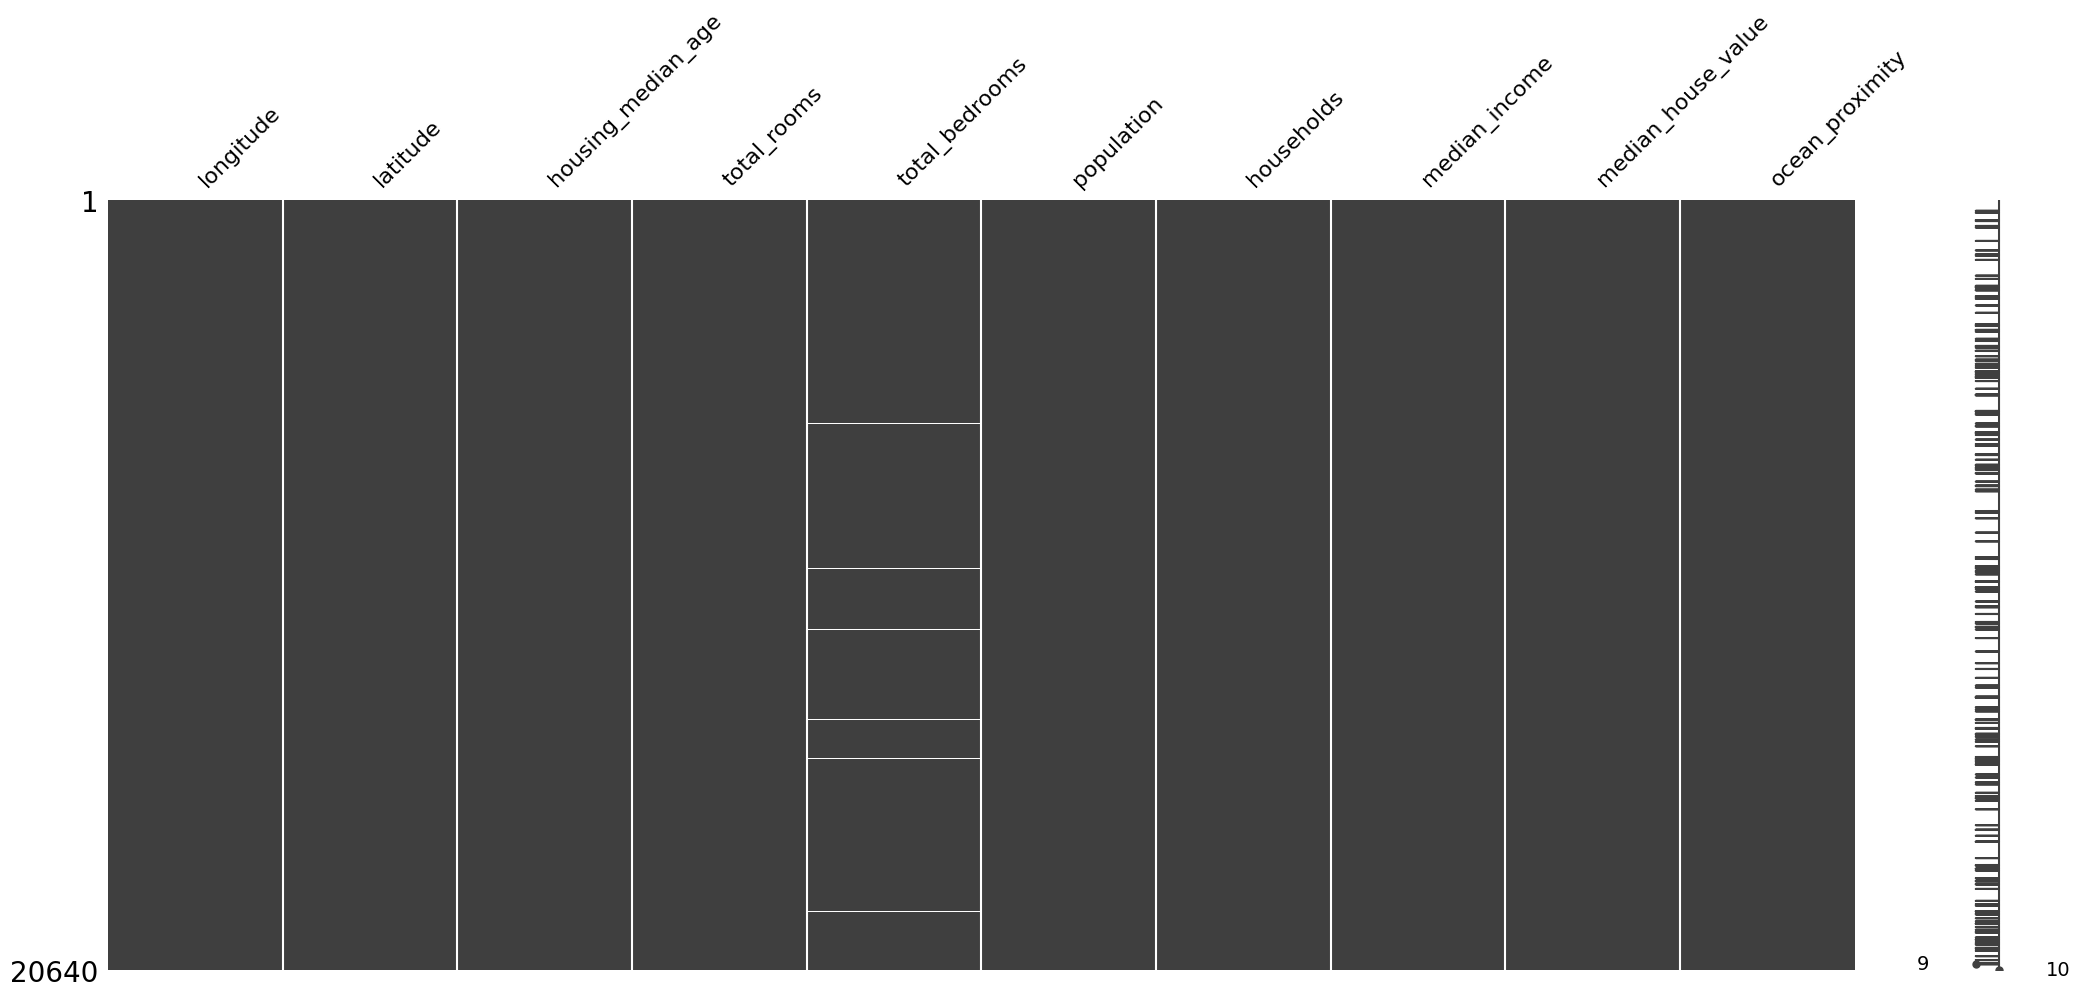

In [125]:
# Matrice
msno.matrix(housing_df)

<u> **Interpretation** </u>

Le graphique nous donne une représentation visuelle de la quantité de valeurs manquantes contenues dans notre dataset. Les valeurs manquantes sont matérialisées pas des discontinuités en blanc dans chaque colonnes. On y remarque ces discontinuité que pour la variable  `total_bedrooms`. Les autres n'en contiennent pas et ont donc un nombre total de valeurs manquantes nul.

### Distribution des données

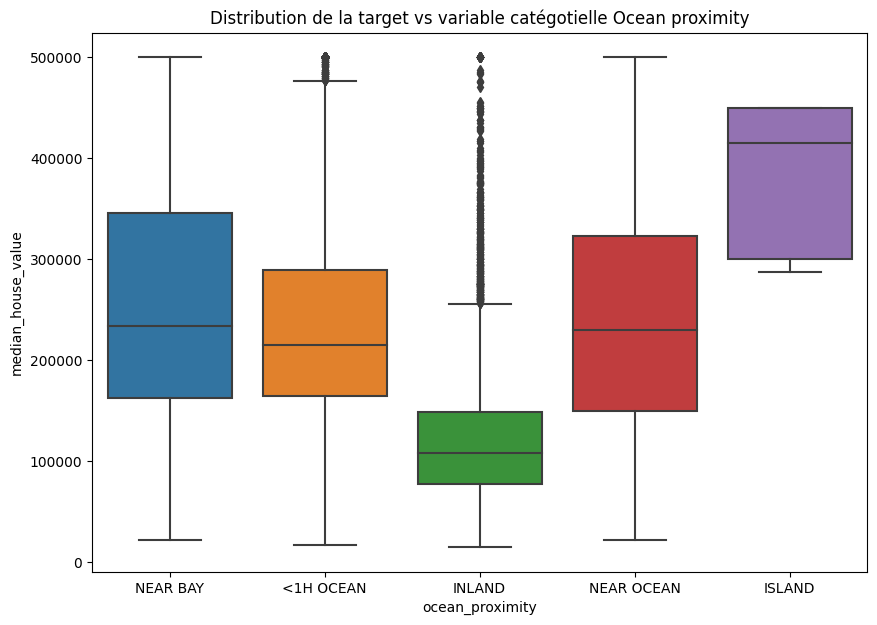

In [191]:
# Boxplot du Label vs chaque variable categorielle 
# si le nombre de catégories n'excède 10, sinon des barplots
plt.figure(figsize=(10,7))
sns.boxplot(x=housing_df["ocean_proximity"], y=housing_df["median_house_value"], data = housing_df)
plt.title("Distribution de la target vs variable catégotielle Ocean proximity")
plt.show()

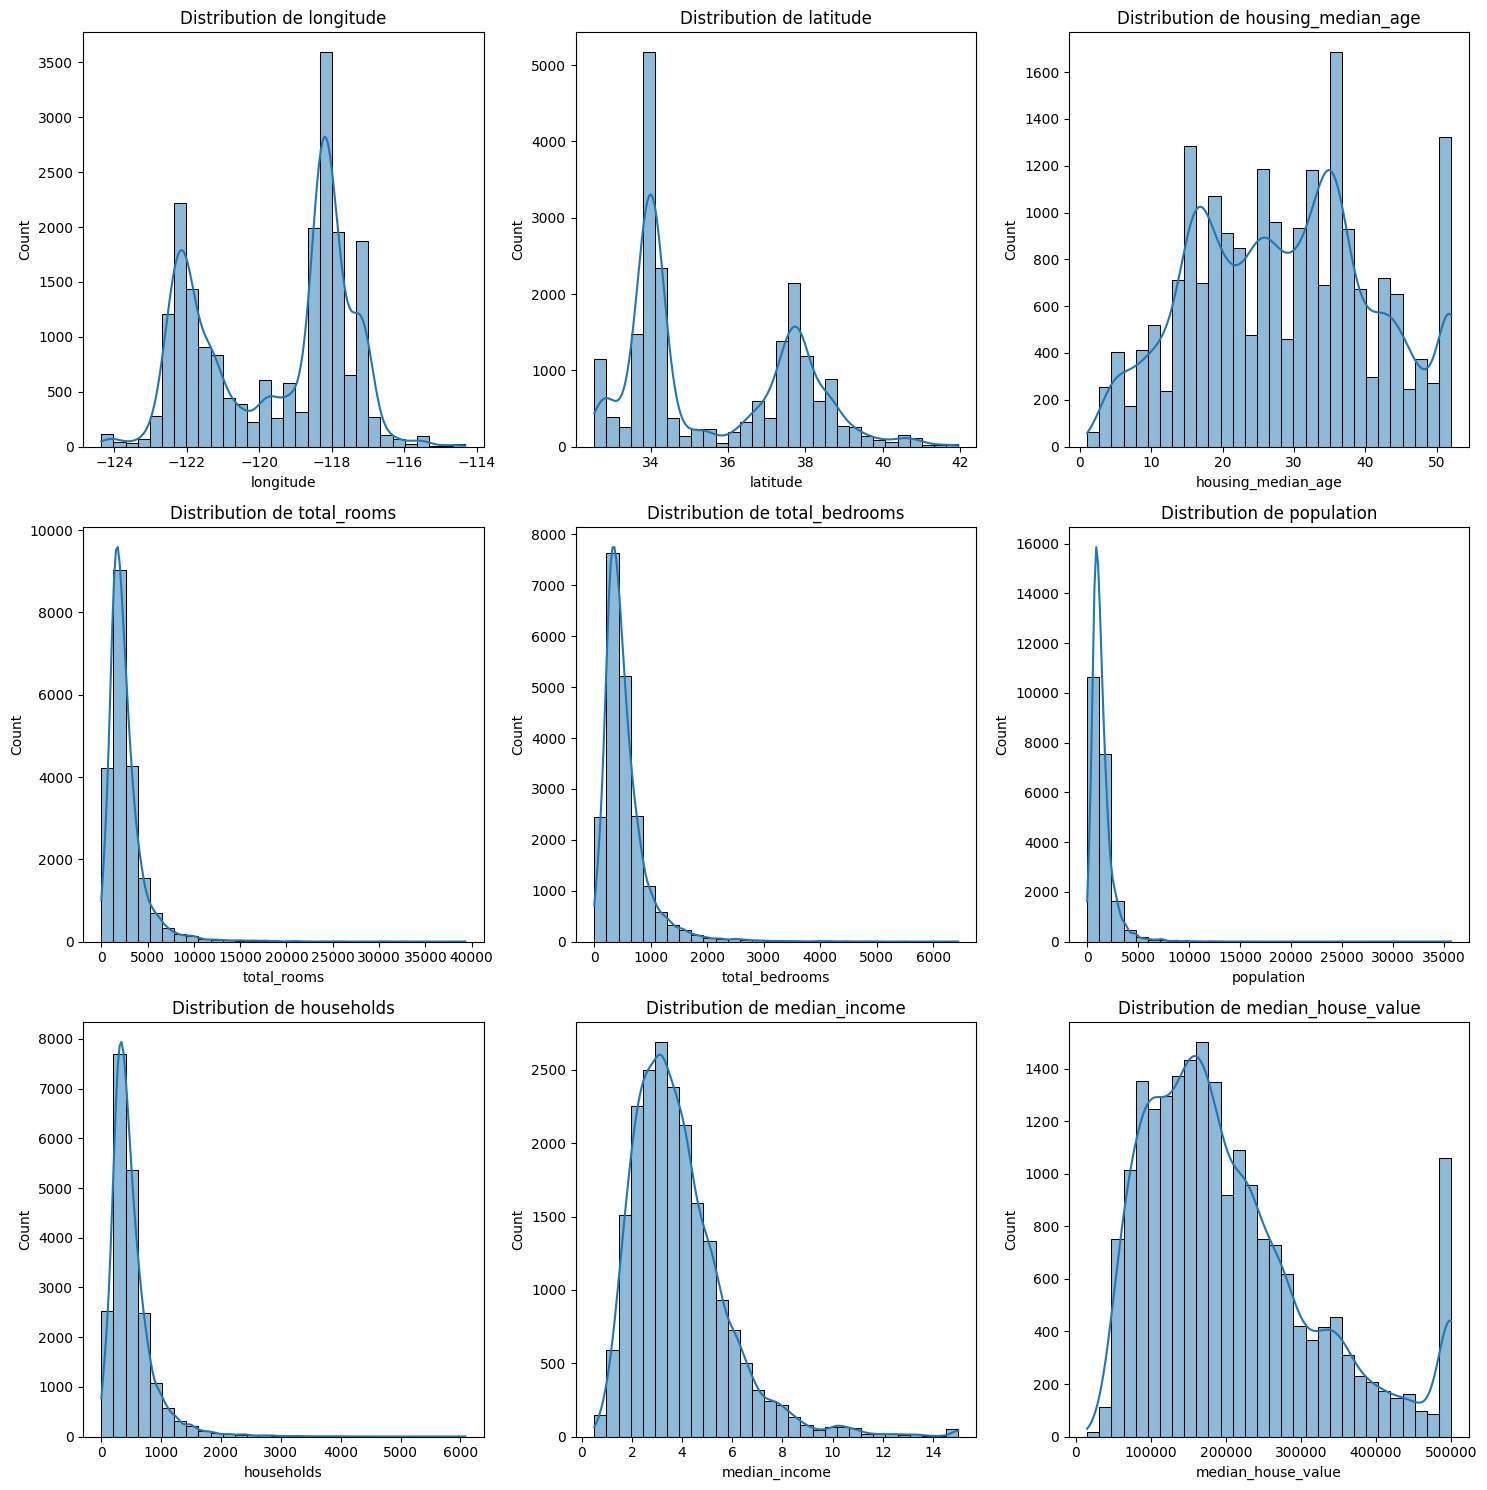

In [215]:
# subplots des distributions de toutes les variables numériques
fig, axes = plt.subplots(3,3,figsize=(15,15))
numeric_columns = housing_df.select_dtypes(include = ["float64","int64"]).columns

for ax_,col in zip(axes.flatten(),numeric_columns) :
    sns.histplot(housing_df[col], bins=30, kde=True, ax=ax_)
    ax_.set_title(f"Distribution de {col}")
    ax_.set_xlabel(col)
plt.tight_layout()
plt.show()

### Matrice de correlations

In [109]:
housing_df.corr().style.background_gradient()

C:\Users\zumso\AppData\Local\Temp\ipykernel_5732\2732433240.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_df.corr().style.background_gradient()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


### Résumé de la partie exploratoire - transformations pertinentes?

## Préparation des données

### Gestion des données manquantes

- Utilisez l'une des trois approches classiques de gestion de données manquantes (suppression, encodage, imputation) à ce jeu de données et justifier votre choix. Discuter égalment de l'impact de votre approche sur les performances du modèle de prédiction du pric médian que vous concevrez plutard.

In [4]:
# gestion des données manquantes
housing_train_clean_df = housing_df.dropna()

<u> Justification </u>

On a un total de `207` valeurs manquantes présentes dans notre dataset sur un total de plus de `20.000` soit environ 1%. De plus ces valeurs manquantes parasissent être des MAR (Missing At Random). Donc les supprimer n'aurait d'une part aucune incidence pertinente sur la taille de notre dataset et d'autre part n'occasionnerait pas de perte d'informations sous jacentes. De plus, dans ce cas, supprimer les valeurs manquantes plutôt que de penser à les remplacer permet de ne pas biaiser les résultats finaux de notre modèle avec des approximations.

In [5]:
print(housing_train_clean_df.isna().sum(), "\n")
print("Total de valeurs manquantes : ",housing_train_clean_df.isna().sum().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64 

Total de valeurs manquantes :  0


### Correction ou suppression de valeurs aberrantes

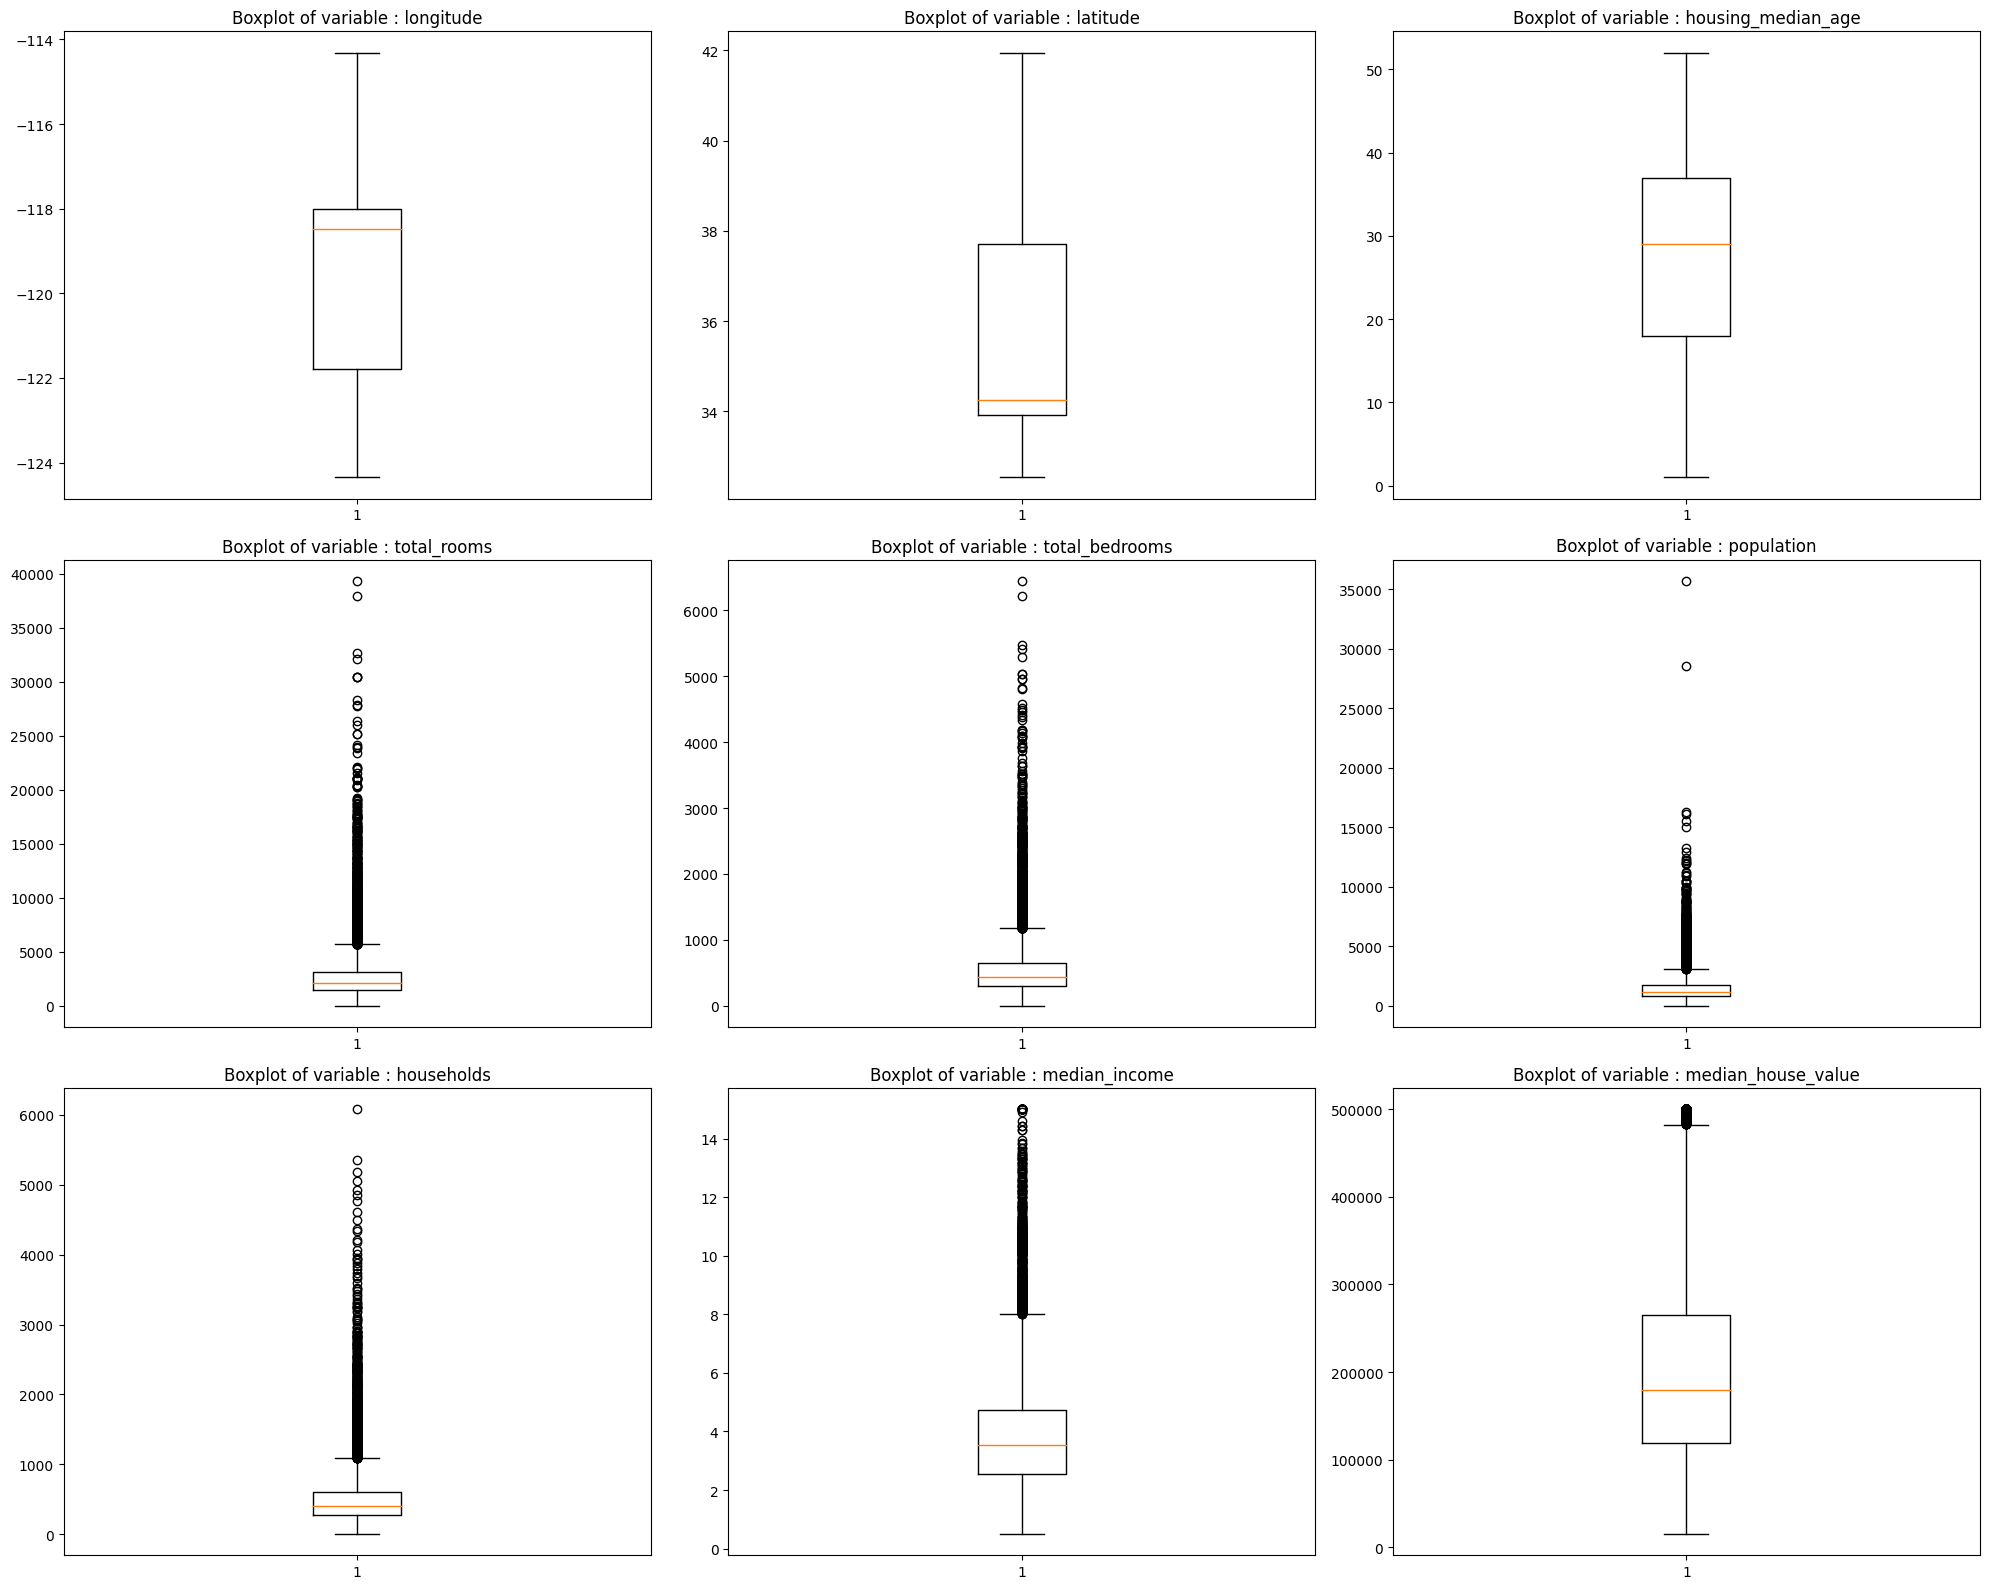

In [260]:
plt.figure(figsize=(20, 16))

for i, col in enumerate(housing_train_clean_df.select_dtypes(include=['float64','int64']).columns):
    plt.subplot(3, 3,i+1)
    plt.boxplot(housing_train_clean_df.select_dtypes(include=['float64','int64'])[col])
    plt.title(f"Boxplot of variable : {col}")


plt.tight_layout()


plt.show()

**Stratégie** : Modèle d'apprentissage non-supervisé `IsolationForest` pour la suppression des valeurs manquantes

In [8]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(random_state=42)
outliers = iso_forest.fit_predict(housing_train_clean_df.drop(columns=['ocean_proximity']))
data_without_nan_with_outliers = housing_train_clean_df.copy()
housing_train_clean_df = housing_train_clean_df[outliers == 1]


print("Taille du dataset avant la suppression des outliers", data_without_nan_with_outliers.shape)

print("Taille du dataset après la suppression des outliers", housing_train_clean_df.shape)
per_outliers = round(100-(housing_train_clean_df.shape[0]*100/data_without_nan_with_outliers.shape[0]), 2)
print("Pourcentage de valeurs abbérantes supprimées : ", str(per_outliers)+" %")

Taille du dataset avant la suppression des outliers (20433, 10)
Taille du dataset après la suppression des outliers (17733, 10)
Pourcentage de valeurs abbérantes supprimées :  13.21 %


### Sélection de features

In [17]:
# supprimez les variables ne fournissant pas d'informations utiles
# pour prédire le prix médian des maisons


### Feature engineering

- Discrétisez les variables continues
- Décomposez les features si nécessaire : catégorie, date/time,...
- Effectuez des transformations prometeuses : aggrégation, log(x), sqrt(x),...


1- Discréditation des variables continues : 

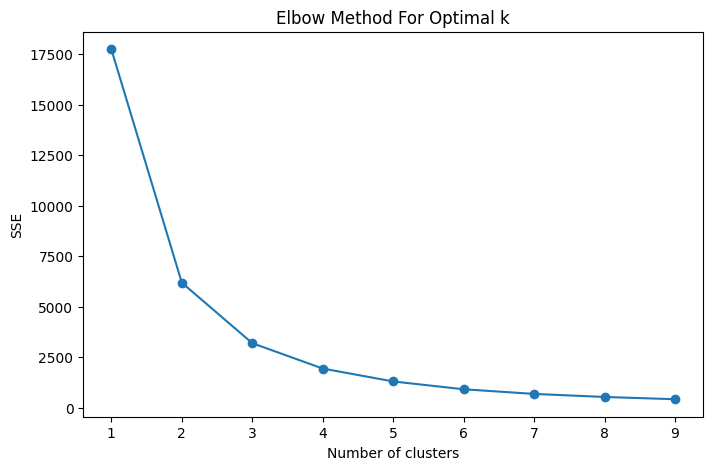

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(housing_train_clean_df['households'].values.reshape(-1,1))


sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

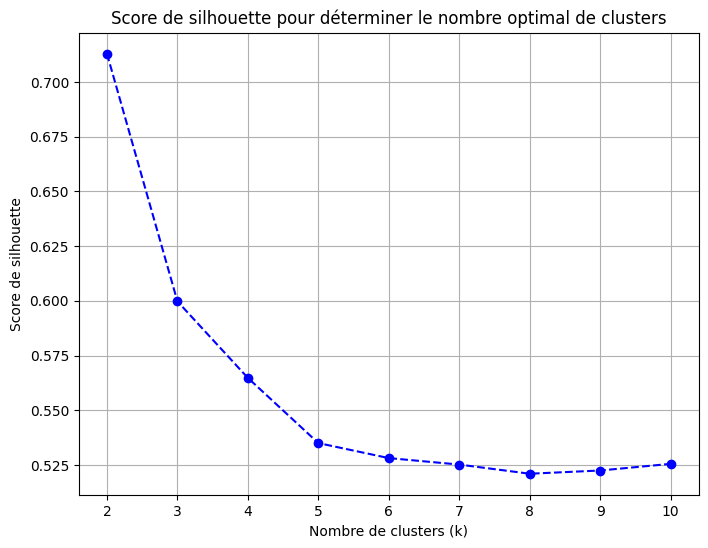

In [8]:
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(housing_train_clean_df['households'].values.reshape(-1,1))

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour déterminer le nombre optimal de clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


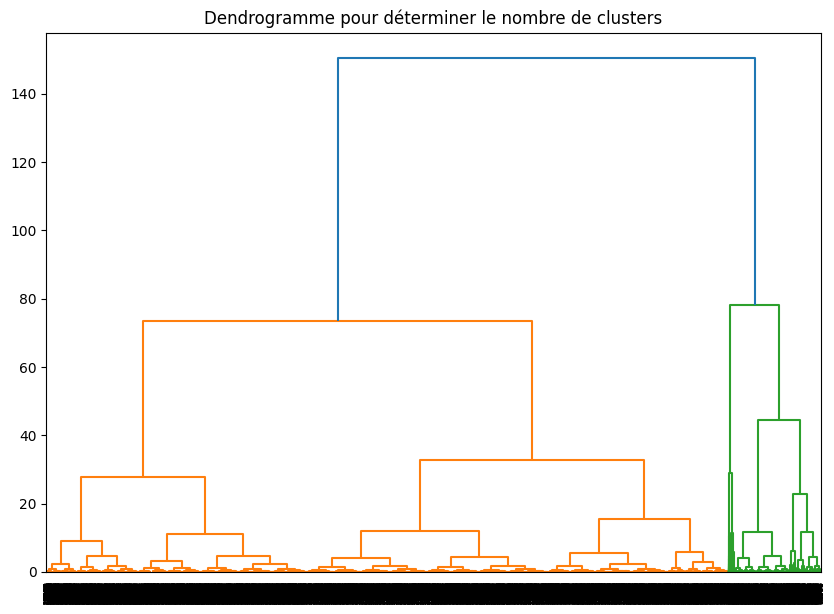

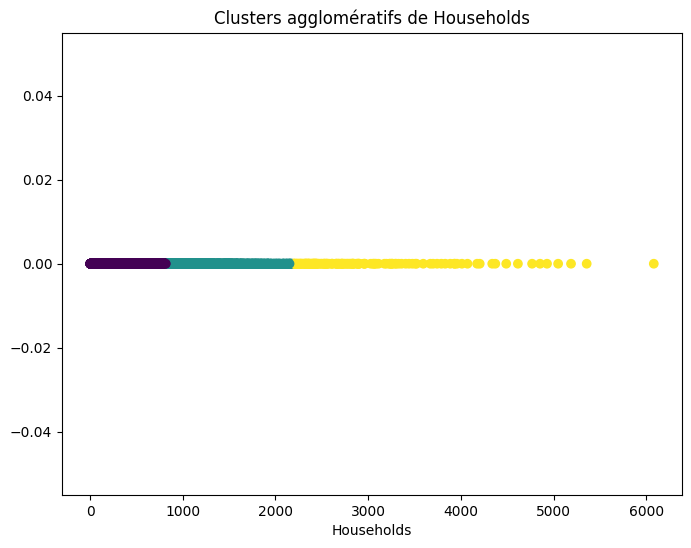

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

households_scaled = scaler.fit_transform(housing_train_clean_df['households'].values.reshape(-1,1))

# Création d'un dendrogramme
linked = linkage(households_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogramme pour déterminer le nombre de clusters')
plt.show()


agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(households_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(housing_train_clean_df['households'], [0]*len(housing_train_clean_df), c=clusters, cmap='viridis')
plt.xlabel('Households')
plt.title('Clusters agglomératifs de Households')
plt.show()


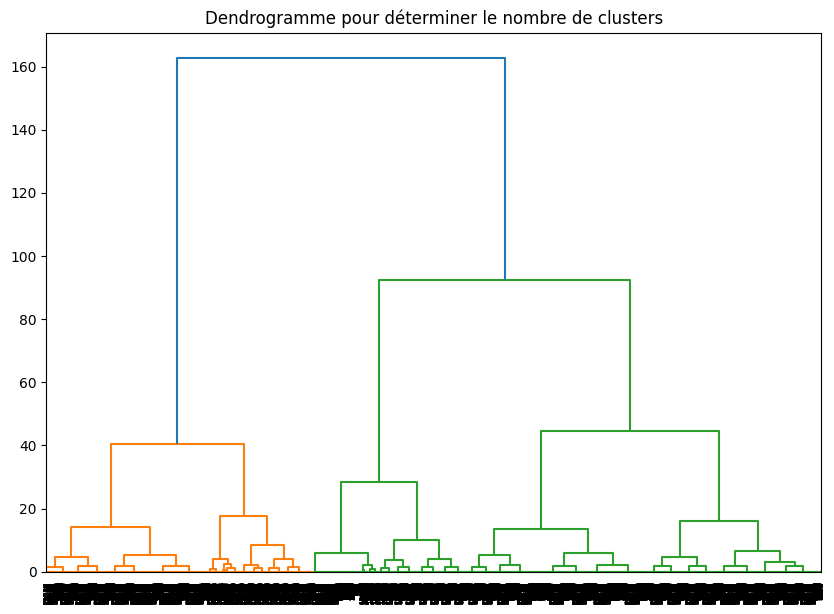

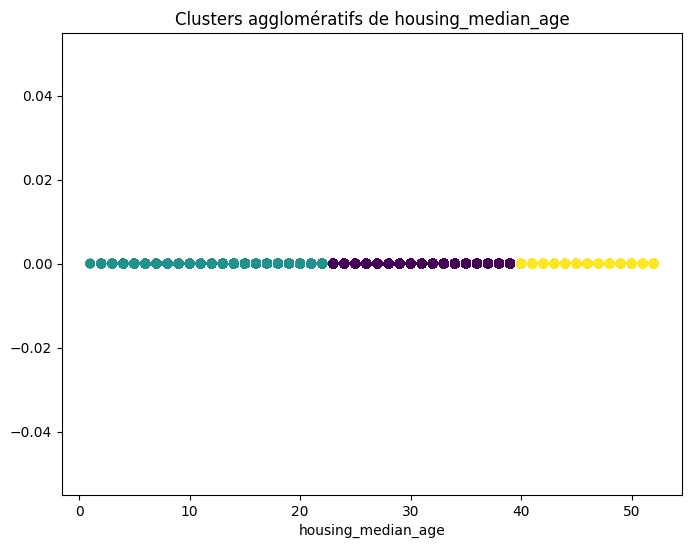

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

households_scaled = scaler.fit_transform(housing_train_clean_df['housing_median_age'].values.reshape(-1,1))


linked = linkage(households_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogramme pour déterminer le nombre de clusters')
plt.show()

agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(households_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(housing_train_clean_df['housing_median_age'], [0]*len(housing_train_clean_df), c=clusters, cmap='viridis')
plt.xlabel('housing_median_age')
plt.title('Clusters agglomératifs de housing_median_age')
plt.show()


In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

households_scaled = scaler.fit_transform(housing_train_clean_df['population'].values.reshape(-1,1))

linked = linkage(households_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogramme pour déterminer le nombre de clusters')
plt.show()


agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(households_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(housing_train_clean_df['population'], [0]*len(housing_train_clean_df), c=clusters, cmap='viridis')
plt.xlabel('population')
plt.title('Clusters agglomératifs de population')
plt.show()


KeyboardInterrupt: 

### [Feature Scaling and/or Normalization](https://colab.research.google.com/github/ml-course/master/blob/master/notebooks/06%20-%20Data%20Preprocessing.ipynb)

- Réduiser à la même échelle entre 0 et 1 toutes les variables numériques

### Encoder les variables catégorielles

### Créer un pipeline 

- Créez un pipeline pour automatiser les transformations effectuer sur l'ensemble d'entraînement et éviter les fuites de données

- Séparez la donnée d'entraînement en ensemble d'entraînement et de validation

- Appliquer le pipeline créer dessus